In [1]:
import subprocess, shlex

In [2]:
path = '/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/MultiHiggs/analysis/MultiHAnalysis/input/Run2_UL/RunIISummer20UL17NanoAODv9/NMSSM_XToYHTo6B'
private_path = '/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/MultiHiggs/analysis/MultiHAnalysis/input/PrivateMC_2018/NMSSM_XYH_YToHH_6b'
# private_path = '/eos/uscms/store/group/lpchbb/srosenzw/XYH_YToHH/tarballs_6b/'

In [3]:
cmd = f"ls {path}"

In [4]:
output = subprocess.check_output(shlex.split(cmd))
output = output.decode('UTF-8').split('\n')
output = output[:-1]

In [5]:
# output[0].split('_')

In [6]:
MX = np.array([int(out.split('_')[2].split('-')[1]) for out in output])
MY = np.array([int(out.split('_')[3].split('-')[1]) for out in output])

In [7]:
MX_MY = np.array([[mx,my] for mx in MX for my in MY if mx >= my + 125])
MX_MY = np.asarray([[mx,my] for mx,my in zip(MX,MY)])
MX_MY.shape

(381, 2)

In [8]:
cmd = f"ls {private_path}"
output = subprocess.check_output(shlex.split(cmd))
output = output.decode('UTF-8').split('\n')
output = output[:-1]

private_MX = np.array([int(out.split('_')[5]) for out in output])
private_MY = np.array([int(out.split('_')[7].split('.')[0]) for out in output])

In [9]:
private_MX_MY = np.array([[mx,my] for mx in private_MX for my in private_MY if mx >= my + 125])
private_MX_MY = np.asarray([[mx,my] for mx,my in zip(private_MX,private_MY)])
private_MX_MY.shape

(133, 2)

In [10]:
MX_min = 375 # GeV
MY_min = 250 # GeV

def f(MX):
   return MX - 125

In [11]:
import matplotlib.pyplot as plt
plt.style.use(CMS)
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

In [12]:
MX.max()+50, MY.max()+100

(4050, 2900)

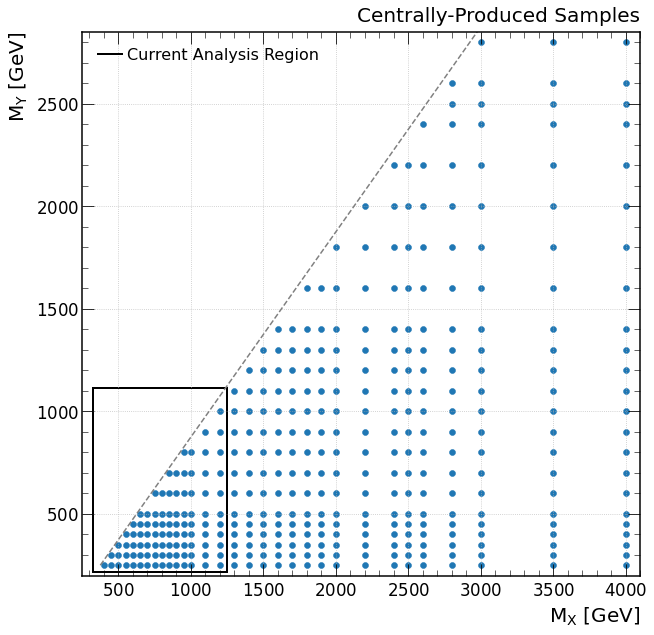

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(MX_MY[:,0], MX_MY[:,1], lw=0.5)
ax.set_xlabel(r'$M_X$ [GeV]')
ax.set_ylabel(r'$M_Y$ [GeV]')
ax.grid()
ax.set_ylim(200, MY.max()+50)
ax.set_xlim(250, MX.max()+100)

ax.plot([MX_min, MX.max()],[MY_min,f(MX.max())],c='gray',ls='--')

analysis_box = Rectangle((325,215),925,900,fill=False,color='k',lw=2)
ax.add_artist(analysis_box)

analysis_legend = [Line2D([0],[0],color='k',lw=2)]
ax.legend(analysis_legend, ['Current Analysis Region'])

ax.set_title('Centrally-Produced Samples')

fig.savefig("plots/diagrams/mass_grid.pdf", bbox_inches='tight')
plt.show()

In [14]:
from matplotlib.lines import Line2D

In [15]:
central = []
private = []
both = []
for mx,my in MX_MY:
    mask1 = private_MX_MY[:,0] == mx
    mask2 = private_MX_MY[:,1] == my
    if np.any(mask1 & mask2):
    # if mx in private_MX_MY[:,0] and my in private_MX_MY[:,1]:
        both.append([mx,my])
    else:
        central.append([mx,my])

In [16]:
both = np.asarray(both)
central = np.asarray(central)

In [17]:
both

array([[1000,  250],
       [1000,  300],
       [1000,  350],
       [1000,  400],
       [1000,  450],
       [1000,  500],
       [1000,  600],
       [1000,  700],
       [1000,  800],
       [1100,  250],
       [1100,  300],
       [1100,  350],
       [1100,  400],
       [1100,  450],
       [1100,  500],
       [1100,  600],
       [1100,  700],
       [1100,  800],
       [1100,  900],
       [1200, 1000],
       [1200,  250],
       [1200,  300],
       [1200,  350],
       [1200,  400],
       [1200,  450],
       [1200,  500],
       [1200,  600],
       [1200,  700],
       [1200,  800],
       [1200,  900],
       [ 400,  250],
       [ 450,  250],
       [ 450,  300],
       [ 500,  250],
       [ 500,  300],
       [ 500,  350],
       [ 550,  250],
       [ 550,  300],
       [ 550,  350],
       [ 550,  400],
       [ 600,  250],
       [ 600,  300],
       [ 600,  350],
       [ 600,  400],
       [ 600,  450],
       [ 650,  250],
       [ 650,  300],
       [ 650,

In [18]:
len(both)

96

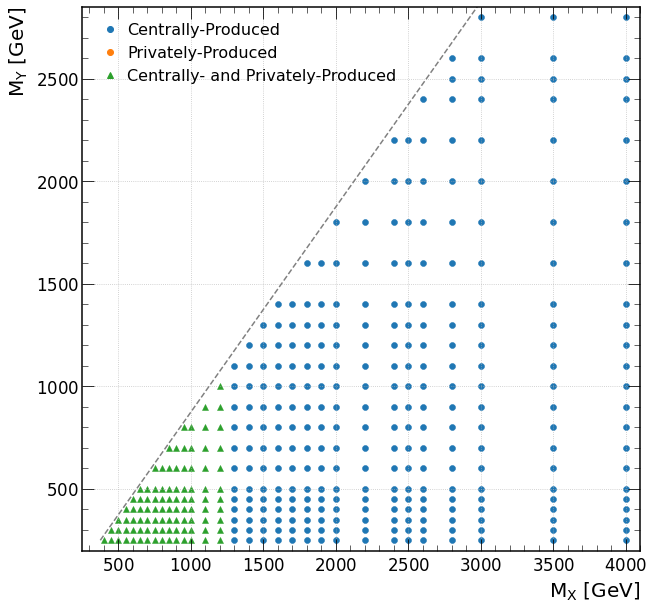

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(central[:,0], central[:,1], lw=0.5, label='Centrally-Produced')
# ax.scatter(private_MX_MY[:,0], private_MX_MY[:,1], lw=0.5, label='Privately-Produced', color='white')
ax.scatter(both[:,0], both[:,1], lw=0.5, label='Privately-Produced', marker='^', color='C2')
ax.set_xlabel(r'$M_X$ [GeV]')
ax.set_ylabel(r'$M_Y$ [GeV]')
ax.grid()
ax.set_ylim(200, MY.max()+50)
ax.set_xlim(250, MX.max()+100)

ax.plot([MX_min, MX.max()],[MY_min,f(MX.max())],c='gray',ls='--')

# analysis_box = Rectangle((325,215),925,900,fill=False,color='k',lw=2)
# ax.add_artist(analysis_box)

handle1 = Line2D([], [], color='C0', marker='o', markersize=6, lw=0, label='Centrally-Produced')
handle2 = Line2D([], [], color='C1', marker='o', markersize=6, lw=0, label='Privately-Produced')
handle3 = Line2D([], [], color='C2', marker='^', markersize=6, lw=0, label='Centrally- and Privately-Produced')
ax.legend(handles=[handle1, handle2, handle3])

# analysis_legend = [Line2D([0],[0],color='k',lw=2)]
# ax.legend(analysis_legend, ['Current Analysis Region'])



# ax.set_title('Centrally-Produced Samples')

fig.savefig("plots/diagrams/mass_grid_overlap_central_private.pdf", bbox_inches='tight')
plt.show()



In [4]:
dir_loc = '/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/MultiHiggs/analysis/MultiHAnalysis/input/Run2_UL/RunIISummer20UL18NanoAODv9/NMSSM_XToYHTo6B'
cmd = f"ls {dir_loc}"
output = subprocess.check_output(shlex.split(cmd)).decode('UTF-8').split('\n')
output = [out for out in output if 'NMSSM' in out]

In [9]:
masses = [[int(out.split('_')[2].split('-')[1]), int(out.split('_')[3].split('-')[1])] for out in output]

In [28]:
mass_dict = {int(mx) : [] for mx in np.unique(np.array(masses)[:,0])}

In [29]:
for mx,my in masses:
    mass_dict[mx].append(int(my))

In [30]:
mass_dict

{400: [250],
 450: [250, 300],
 500: [250, 300, 350],
 550: [250, 300, 350, 400],
 600: [250, 300, 350, 400, 450],
 650: [250, 300, 350, 400, 450, 500],
 700: [250, 300, 350, 400, 450, 500],
 750: [250, 300, 350, 400, 450, 500, 600],
 800: [250, 300, 350, 400, 450, 500, 600],
 850: [250, 300, 350, 400, 450, 500, 600, 700],
 900: [250, 300, 350, 400, 450, 500, 600, 700],
 950: [250, 300, 350, 400, 450, 500, 600, 700, 800],
 1000: [250, 300, 350, 400, 450, 500, 600, 700, 800],
 1100: [250, 300, 350, 400, 450, 500, 600, 700, 800, 900],
 1200: [1000, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900],
 1300: [1000, 1100, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900],
 1400: [1000, 1100, 1200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900],
 1500: [1000,
  1100,
  1200,
  1300,
  250,
  300,
  350,
  400,
  450,
  500,
  600,
  700,
  800,
  900],
 1600: [1000,
  1100,
  1200,
  1300,
  1400,
  250,
  300,
  350,
  400,
  450,
  500,
  600,
  700,
  800,
  900],
 1700: [1000,
  1100,


In [18]:
import pandas as pd

In [34]:
df = pd.DataFrame.from_dict(mass_dict, orient='index')

In [62]:
for mx,row in zip(mass_dict.keys(), df.iloc):
    row = row.to_numpy()
    row = row[~np.isnan(row)]
    row = np.array(row, dtype=int)
    row = np.array(row, dtype=str)
    row = row.tolist()
    try: print(f"{mx} & {', '.join(row)} \\")
    except: pass

400 & 250 \
450 & 250, 300 \
500 & 250, 300, 350 \
550 & 250, 300, 350, 400 \
600 & 250, 300, 350, 400, 450 \
650 & 250, 300, 350, 400, 450, 500 \
700 & 250, 300, 350, 400, 450, 500 \
750 & 250, 300, 350, 400, 450, 500, 600 \
800 & 250, 300, 350, 400, 450, 500, 600 \
850 & 250, 300, 350, 400, 450, 500, 600, 700 \
900 & 250, 300, 350, 400, 450, 500, 600, 700 \
950 & 250, 300, 350, 400, 450, 500, 600, 700, 800 \
1000 & 250, 300, 350, 400, 450, 500, 600, 700, 800 \
1100 & 250, 300, 350, 400, 450, 500, 600, 700, 800, 900 \
1200 & 1000, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900 \
1300 & 1000, 1100, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900 \
1400 & 1000, 1100, 1200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900 \
1500 & 1000, 1100, 1200, 1300, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900 \
1600 & 1000, 1100, 1200, 1300, 1400, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900 \
1700 & 1000, 1100, 1200, 1300, 1400, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900 \
1800 & 